# Opening Situation
![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

## crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [396]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


## EDA dataset

### Check missing value

In [397]:
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
dtype: int64

### Handle "Vict Sex" missing value

In [398]:
crimes['Vict Sex'].value_counts(dropna=False)

M      101028
F       90804
NaN     32248
X       23877
H          30
-           1
Name: Vict Sex, dtype: int64

In [399]:
# Replace missing values 'H' and '-' with 'X' in Vict Sex column
crimes['Vict Sex'] = crimes['Vict Sex'].replace(['H', '-'], 'X')
crimes['Vict Sex'] = crimes['Vict Sex'].fillna('X')

### Handle "Vict Descent" missing value

In [400]:
crimes['Vict Descent'].value_counts(dropna=False)

H      75350
W      48593
B      35307
NaN    32249
X      26059
O      19516
A       5610
K       1398
F       1232
C       1210
J        434
V        329
I        322
Z        145
P         83
U         77
D         21
L         20
S         17
G         14
-          2
Name: Vict Descent, dtype: int64

In [401]:
crimes['Vict Descent'] = crimes['Vict Descent'].replace('-','X')
crimes['Vict Descent'] = crimes['Vict Descent'].fillna('X')

In [402]:
crimes['Weapon Desc'].value_counts(dropna=False)

NaN                                               167901
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     42115
UNKNOWN WEAPON/OTHER WEAPON                         8571
VERBAL THREAT                                       6366
HAND GUN                                            5116
                                                   ...  
ANTIQUE FIREARM                                        3
RELIC FIREARM                                          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
BOWIE KNIFE                                            1
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    1
Name: Weapon Desc, Length: 75, dtype: int64

In [403]:
crimes['Weapon Desc'] = crimes['Weapon Desc'].fillna('No Description')
crimes.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64

## "Vict Age" dataset

In [404]:
crimes['Vict Age'].describe()

count    247988.000000
mean         29.954764
std          21.901016
min          -2.000000
25%           0.000000
50%          31.000000
75%          45.000000
max          99.000000
Name: Vict Age, dtype: float64

In [405]:
crimes['Vict Age'].value_counts()

 0     62240
 30     5715
 35     5697
 32     5481
 31     5472
       ...  
 95       25
 94       23
 97       22
 98       17
-2         7
Name: Vict Age, Length: 101, dtype: int64

In [406]:
crimes['Vict Age'] = crimes['Vict Age'].where(crimes['Vict Age'] >= 0, 0)
crimes['Vict Age'].value_counts()

0     62273
30     5715
35     5697
32     5481
31     5472
      ...  
96       27
95       25
94       23
97       22
98       17
Name: Vict Age, Length: 99, dtype: int64

# Dataset use for analysis


In [407]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,No Description,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Description,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Description,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Description,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,No Description,Invest Cont,6200 4TH AV


## Question 1: Peak Crime Hour
Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [408]:
crimes['Hour'] = crimes['TIME OCC'].str[:2]
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,No Description,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Description,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Description,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Description,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,No Description,Invest Cont,6200 4TH AV,06


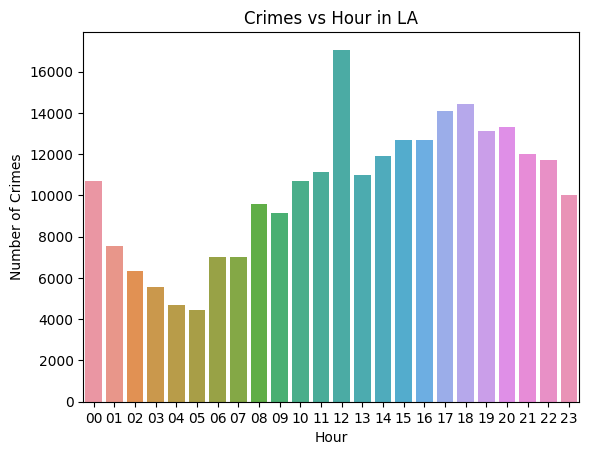

In [409]:
crimes['Hour'] = crimes['TIME OCC'].str[:2]

sns.countplot(x=crimes['Hour'].sort_values(),data=crimes)
plt.title('Crimes vs Hour in LA')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

In [410]:
crime_hour = crimes.groupby('Hour').size().sort_values(ascending=False)
crime_hour

Hour
12    17065
18    14447
17    14107
20    13325
19    13146
16    12676
15    12671
21    12008
14    11889
22    11697
11    11120
13    11009
10    10720
00    10696
23    10039
08     9600
09     9138
01     7564
07     7011
06     7008
02     6352
03     5564
04     4696
05     4440
dtype: int64

In [411]:
peak_crime_hour = int(crime_hour.index[0])
peak_crime_hour

12

## Question 2: Peak Night Crime Area
Which area has the largest frequency of night crimes (crimes committed between 10pm and 4am)? Save as a string variable called peak_night_crime_location.

In [412]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,No Description,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Description,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Description,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Description,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,No Description,Invest Cont,6200 4TH AV,06


In [413]:
night_crimes = crimes[(crimes['Hour'] >= '22') | (crimes['Hour'] <= '04')]
area_night = night_crimes['AREA NAME'].value_counts(ascending=False)
area_night

Central        4432
77th Street    3653
Hollywood      3583
Newton         3178
Olympic        3122
Southeast      3088
Pacific        3058
Southwest      3014
N Hollywood    2880
Rampart        2676
Northeast      2526
Wilshire       2450
West Valley    2349
Harbor         2301
Van Nuys       2273
Devonshire     2076
Hollenbeck     2061
Mission        2049
West LA        2048
Topanga        1906
Foothill       1885
Name: AREA NAME, dtype: int64

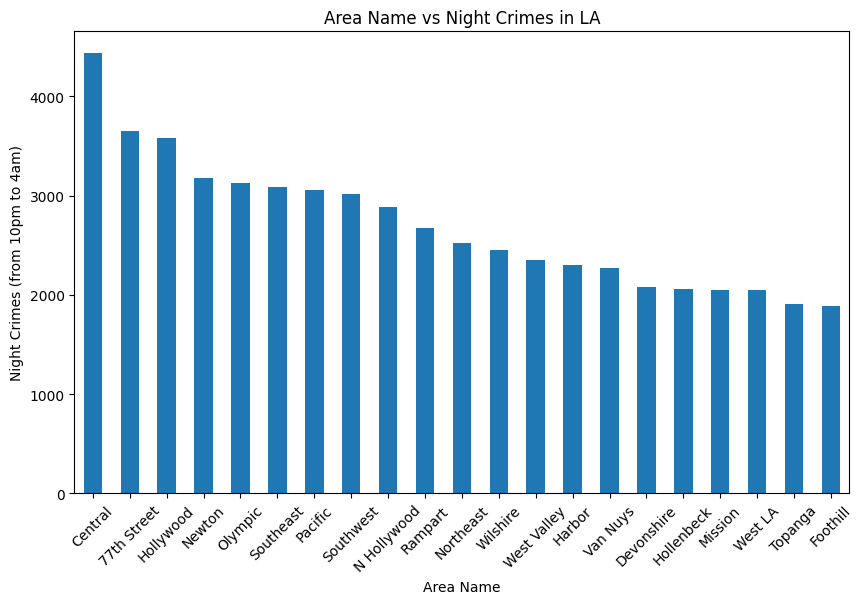

In [414]:
import matplotlib.pyplot as plt

# Count the occurrences of each Area Name in night_crimes
area_counts = night_crimes['AREA NAME'].value_counts()

# Plot the count of each Area Name
plt.figure(figsize=(10, 6))
area_counts.plot(kind='bar')
plt.title('Area Name vs Night Crimes in LA')
plt.xlabel('Area Name')
plt.ylabel('Night Crimes (from 10pm to 4am)')
plt.xticks(rotation=45)
plt.show()

In [415]:
peak_night_crime_location = area_night.index[0]
peak_night_crime_location

'Central'

## Question 3: Crimes vs Age Group
Identify the number of crimes committed against victims by age group (<18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [416]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,X,No Description,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Description,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Description,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Description,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,No Description,Invest Cont,6200 4TH AV,06


<AxesSubplot: >

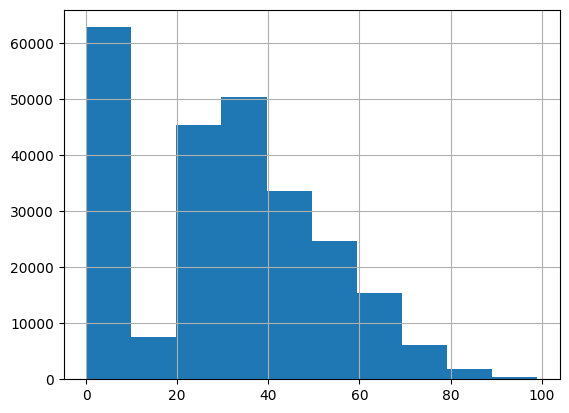

In [417]:
crimes['Vict Age'].hist()

<AxesSubplot: >

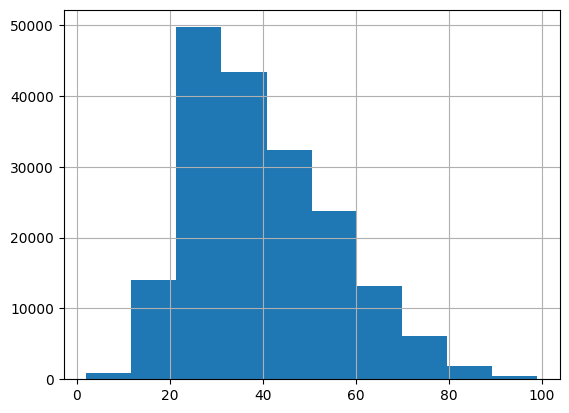

In [418]:
nonzero_age = crimes[crimes['Vict Age'] != 0]
nonzero_age['Vict Age'].hist()

In [419]:
bins = [0,17,25,34,44,54,64,np.inf]
labels = ['<18','18-25','26-34','35-44','45-54','55-64','65+']

nonzero_age['Vict Age Type'] = pd.cut(nonzero_age['Vict Age'],bins=bins,labels=labels)
nonzero_age.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Vict Age Type
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Description,Invest Cont,2500 S SYCAMORE AV,11,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Description,Invest Cont,3300 SAN MARINO ST,16,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Description,Invest Cont,1900 TRANSIENT,12,26-34
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,No Description,Invest Cont,6200 4TH AV,06,35-44
5,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,No Description,Invest Cont,1200 W 7TH ST,09,65+


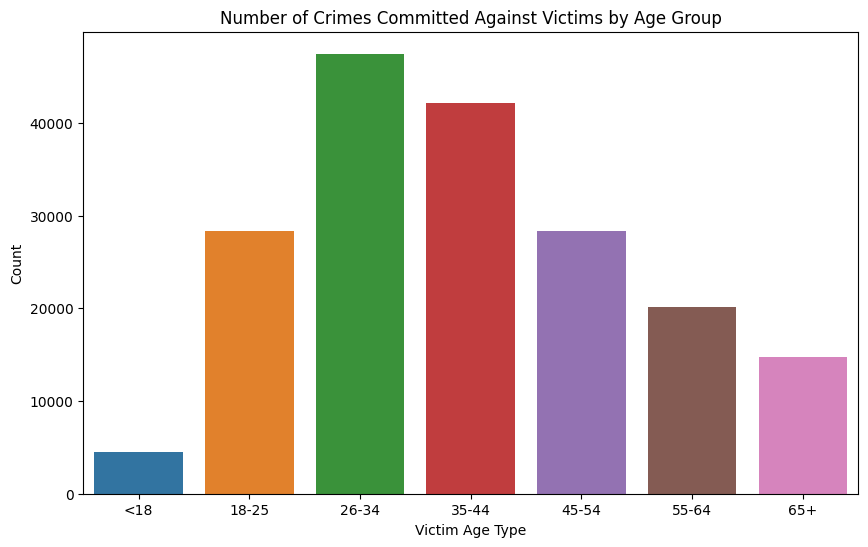

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=nonzero_age, x='Vict Age Type')
plt.xlabel('Victim Age Type')
plt.ylabel('Count')
plt.title('Number of Crimes Committed Against Victims by Age Group')
plt.show()

In [421]:
victim_ages = nonzero_age['Vict Age Type'].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: Vict Age Type, dtype: int64